<a href="https://colab.research.google.com/github/Thejasmayur31/TASK-6_ELEVATELAB_INTERN/blob/main/TASK_6_ELEVATELAB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1/7/2025

# **Task 6: K-Nearest Neighbors (KNN) Classification**
 Objective: Understand and implement KNN for classification problems.
 Tools:  Scikit-learn, Pandas, Matplotlib


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [2]:
df = pd.read_csv('/content/voice.csv')

In [3]:
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [4]:
df.isnull().sum()

,0
meanfreq,0
sd,0
median,0
Q25,0
Q75,0
IQR,0
skew,0
kurt,0
sp.ent,0
sfm,0


In [5]:
df['label'] = df['label'].map({'male': 0, 'female': 1})   # cat ---> num

In [6]:
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,0
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,0
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,0
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,0
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,0


In [8]:
x=df.drop('label',axis=1)
y=df['label']

In [9]:
scalar = StandardScaler()
x_scaled = scalar.fit_transform(x)

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

In [11]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [12]:
y_pred = knn.predict(x_test)
acc= accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

Accuracy: 0.9810725552050473


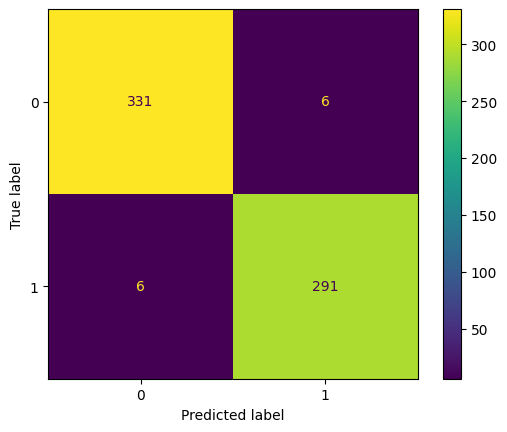

In [13]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [16]:
print("\nAccuracy for different K values:")
for k in range(1, 11):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(x_train, y_train)
    pred_k = model.predict(x_test)
    acc = accuracy_score(y_test, pred_k)
    print(f"K = {k} --> Accuracy = {acc:.2f}")


Accuracy for different K values:
K = 1 --> Accuracy = 0.97
K = 2 --> Accuracy = 0.98
K = 3 --> Accuracy = 0.98
K = 4 --> Accuracy = 0.98
K = 5 --> Accuracy = 0.98
K = 6 --> Accuracy = 0.97
K = 7 --> Accuracy = 0.98
K = 8 --> Accuracy = 0.97
K = 9 --> Accuracy = 0.98
K = 10 --> Accuracy = 0.97


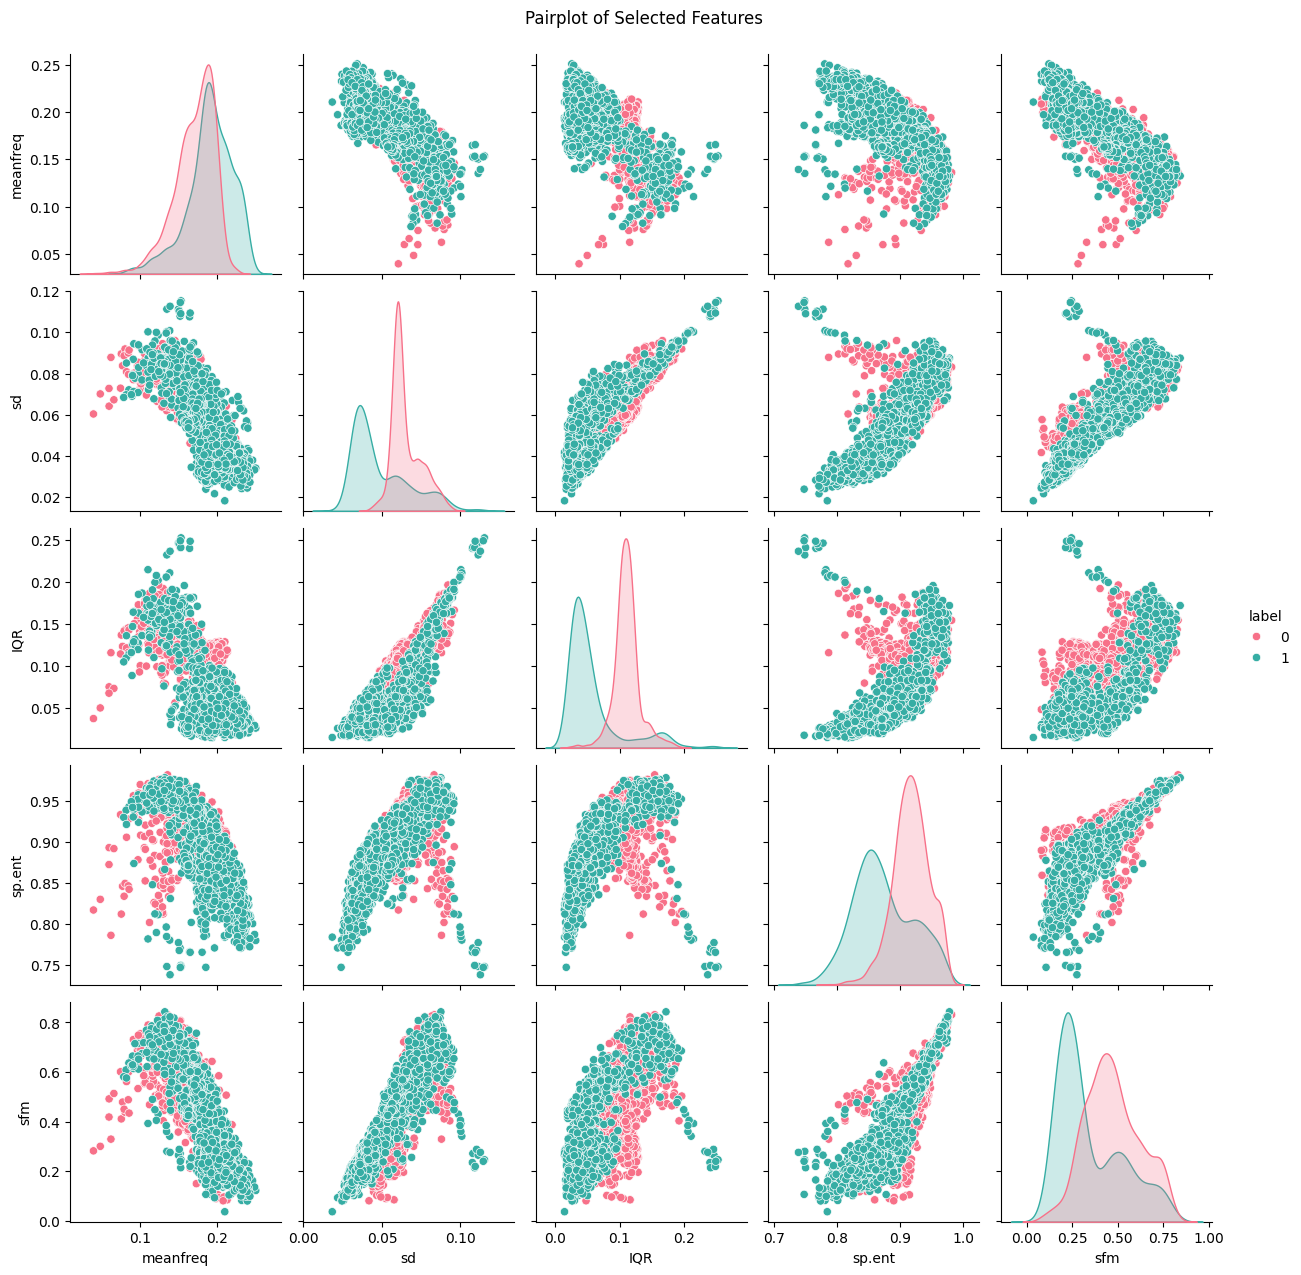

In [17]:
import seaborn as sns
sns.pairplot(df[['meanfreq', 'sd', 'IQR', 'sp.ent', 'sfm', 'label']], hue='label', palette='husl')
plt.suptitle("Pairplot of Selected Features", y=1.02)
plt.show()
